# PDEfind for dataset 1 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from aux_for_PDE_find import *

torch.manual_seed(0)
np.random.seed(0)

## Dataset preparation

In [2]:
path_train = "PDEfind_data/1.npz"
data_npz = np.load(path_train)

# Load the data from the .npz file
u = torch.from_numpy(data_npz['u']).type(torch.float32)  # Solution or field
u_plot = u
x = torch.from_numpy(data_npz['x']).type(torch.float32)  # Spatial variable
t = torch.from_numpy(data_npz['t']).type(torch.float32)  # Temporal variable

## Build of $\Theta$

In [3]:
dt = t[0,1] - t[0,0]
dx = x[1,0] - x[0,0]

# Compute time derivative
dudt = compute_time_derivative(u, dt).reshape(-1, 1)

# Compute space derivatives
dudx = compute_space_derivative(u, dx, 1)
dudx_2 = compute_space_derivative(u, dx, 2)
dudx_3 = compute_space_derivative(u, dx, 3)

# Compute other terms
u2 = torch.pow(u, 2)
u3 = torch.pow(u, 3)  

# Compute mixed terms
u_times_dudx = torch.mul(u, dudx)
u2_times_dudx = torch.mul(u2, dudx)
u3_times_dudx = torch.mul(u3, dudx)

u_times_dudx_2 = torch.mul(u, dudx_2)
u2_times_dudx_2 = torch.mul(u2, dudx_2)
u3_times_dudx_2 = torch.mul(u3, dudx_2)

u_times_dudx_3 = torch.mul(u, dudx_3)
u2_times_dudx_3 = torch.mul(u2, dudx_3)
u3_times_dudx_3 = torch.mul(u3, dudx_3)

# Compute bias
bias = torch.ones_like(u)

# Reshape all terms
u = u.reshape(-1, 1)
x = x.reshape(-1, 1)
t = t.reshape(-1, 1)
dudx = dudx.reshape(-1, 1)
dudx_2 = dudx_2.reshape(-1, 1)
dudx_3 = dudx_3.reshape(-1, 1)
u2 = u2.reshape(-1, 1)
u3 = u3.reshape(-1, 1) 
u_times_dudx = u_times_dudx.reshape(-1, 1)
u2_times_dudx = u2_times_dudx.reshape(-1, 1)
u3_times_dudx = u3_times_dudx.reshape(-1, 1)  
u_times_dudx_2 = u_times_dudx_2.reshape(-1, 1)
u2_times_dudx_2 = u2_times_dudx_2.reshape(-1, 1)
u3_times_dudx_2 = u3_times_dudx_2.reshape(-1, 1)  
u_times_dudx_3 = u_times_dudx_3.reshape(-1, 1)
u2_times_dudx_3 = u2_times_dudx_3.reshape(-1, 1)
u3_times_dudx_3 = u3_times_dudx_3.reshape(-1, 1)  
bias = bias.reshape(-1, 1)

# Combine all vectors into a single matrix
Theta = torch.cat([
    bias,               # 0
    u,                  # 1
    t,                  # 2
    dudx,               # 3
    dudx_2,             # 4
    dudx_3,             # 5
    u2,                 # 6
    u3,                 # 7
    u_times_dudx,       # 8
    u2_times_dudx,      # 9
    u3_times_dudx,      # 10
    u_times_dudx_2,     # 11
    u2_times_dudx_2,    # 12
    u3_times_dudx_2,    # 13
    u_times_dudx_3,     # 14
    u2_times_dudx_3,    # 15
    u3_times_dudx_3     # 16
], dim=1)

# Update Theta names
Theta_names = [
    "bias",             # 0
    "u",                # 1
    "t",                # 2
    "dudx",             # 3
    "dudx_2",           # 4
    "dudx_3",           # 5
    "u2",               # 6
    "u3",               # 7
    "u_times_dudx",     # 8
    "u2_times_dudx",    # 9
    "u3_times_dudx",    # 10
    "u_times_dudx_2",   # 11
    "u2_times_dudx_2",  # 12
    "u3_times_dudx_2",  # 13
    "u_times_dudx_3",   # 14
    "u2_times_dudx_3",  # 15
    "u3_times_dudx_3"   # 16
]


## Regression and printing of the PDE

#### using myregression

In [4]:
alpha = [0.1,0.01,0.0]
threshold=0.05
selected_names, regression_coef_ = myregression(Theta,dudt,Theta_names,threshold=threshold,alpha=alpha)

Regression # 1
dudx_2  c=  0.09757482908971847
u_times_dudx  c=  -0.8397274272715507
u2_times_dudx  c=  -0.22347012016578469
u3_times_dudx  c=  0.06156163299369226
u2_times_dudx_2  c=  -0.06651384524841851
u3_times_dudx_2  c=  0.07000842799401272
u2_times_dudx_3  c=  0.06498584223067122
u3_times_dudx_3  c=  -0.06357094107094058
Mean Squared Error: 2.4470003140734012e-05
###################### end of regression 1 ##############################

Regression # 2
dudx_2  c=  0.1019495611609053
u_times_dudx  c=  -0.9790623160030162
Mean Squared Error: 4.24003443323056e-06
###################### end of regression 2 ##############################

Regression # 3
dudx_2  c=  0.10078687467303558
u_times_dudx  c=  -0.9976269394555888
Mean Squared Error: 2.4117935749571e-06
###################### end of regression 3 ##############################



In [5]:
printPDE(selected_names, regression_coef_)

dudt = 0.10078687467303558 * dudx_2 +
       -0.9976269394555888 * u_times_dudx


#### using myregression2

In [6]:
alpha = [0.1,0.01,0.0]
threshold=4
selected_names, regression_coef_ = myregression2(Theta,dudt,Theta_names,threshold=threshold,alpha=alpha)

Regression # 1
dudx_2  c=  0.09757482908971847
u_times_dudx  c=  -0.8397274272715507
Mean Squared Error: 9.856991773222004e-05
###################### end of regression 1 ##############################

Regression # 2
dudx_2  c=  0.10078024912431519
u_times_dudx  c=  -0.9975137229550985
Mean Squared Error: 2.41029716743016e-06
###################### end of regression 2 ##############################

Regression # 3
dudx_2  c=  0.10078687467303558
u_times_dudx  c=  -0.9976269394555888
Mean Squared Error: 2.4117935749571e-06
###################### end of regression 3 ##############################



In [7]:
printPDE(selected_names, regression_coef_)

dudt = 0.10078687467303558 * dudx_2 +
       -0.9976269394555888 * u_times_dudx


# Plot

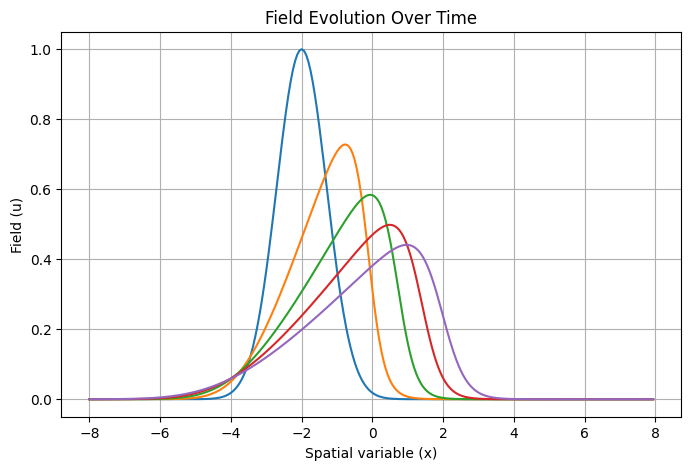

In [8]:
space =  torch.arange(x[0,0], abs(x[0,0]), dx)
plt.figure(figsize=(8, 5))
for i in np.arange(0,100,20):
    plt.plot(space, u_plot[:, i],)

plt.xlabel("Spatial variable (x)")
plt.ylabel("Field (u)")
plt.title("Field Evolution Over Time")
plt.grid()